In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_09_04_2024_19_10_29.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
print(len(evaluation_data))
evaluation_data.tail(10)

1500


,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time(s),LastTokenQuery,EquivalenceQuery,Tree Depth,Inner Nodes,Accuracy_in_target,Accuracy_anywhere,IsEquivalentExact,IsEquivalentOmitZero,IsMinimal
1490,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,1,334.080285,688989,72,16,16,1.0,1.0,True,True,True
1491,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,2,335.863449,688989,72,16,16,1.0,1.0,True,True,True
1492,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,3,334.376774,688989,72,16,16,1.0,1.0,True,True,True
1493,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,4,334.983923,688989,72,16,16,1.0,1.0,True,True,True
1494,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,5,339.801847,688989,72,16,16,1.0,1.0,True,True,True
1495,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,6,335.539221,688989,72,16,16,1.0,1.0,True,True,True
1496,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,7,336.278840,688989,72,16,16,1.0,1.0,True,True,True
1497,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,8,337.365689,688989,72,16,16,1.0,1.0,True,True,True
1498,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,9,337.097750,688989,72,16,16,1.0,1.0,True,True,True
1499,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,10,334.838432,688989,72,16,16,1.0,1.0,True,True,True


In [5]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal'],
      dtype='object')

In [6]:
evaluation_data['Algorithm'].value_counts()

QuantNaryTreeLearner_Omit_Zero_Transitions_exact_teacher    500
QuantNaryTreeLearner_Teacher_Filter_exact                   500
QuantNaryTreeLearner_Standard_Teacher_exact_teacher         500
Name: Algorithm, dtype: int64

In [7]:
def get_prob(x):
    splitted = x.split('_')
    return float("0."+splitted[5])

evaluation_data['Zero_Probability'] = evaluation_data['Instance'].apply(lambda x: get_prob(x))

In [8]:
import math

evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']

In [9]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

cols_to_agg = ['Time(s)', 'LastTokenQuery', 'EquivalenceQuery', 'Extracted Number of States', 'Accuracy_in_target', 'Accuracy_anywhere', 'TREE_SIZE']
funcs =  ['median', IQR]  
names = ['median', 'IQR']  
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Zero_Probability']).agg({x:funcs for x in cols_to_agg})
col_names = [x+"_"+fun_name for x in cols_to_agg for fun_name in names]
grouped_multiple.columns = col_names
#grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
#'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR',]
grouped_multiple.reset_index(inplace = True)

In [10]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal', 'Zero_Probability', 'TREE_SIZE'],
      dtype='object')

In [11]:
evaluation_data_exact = evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' in str(x))]
evaluation_data_sampling =  evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' not in str(x))]

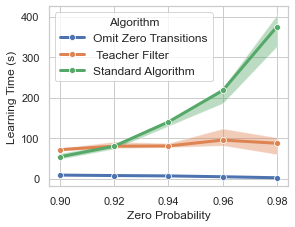

In [13]:
sns.set(rc={'figure.figsize':(10.7/2.5,8.27/2.5)})
sns.set_style("whitegrid")
# Compute quartiles
quartiles = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper left')
plt.xlabel("Zero Probability", fontsize=12)
plt.ylabel("Learning Time (s)", fontsize=12)

new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)

plt.show()